In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

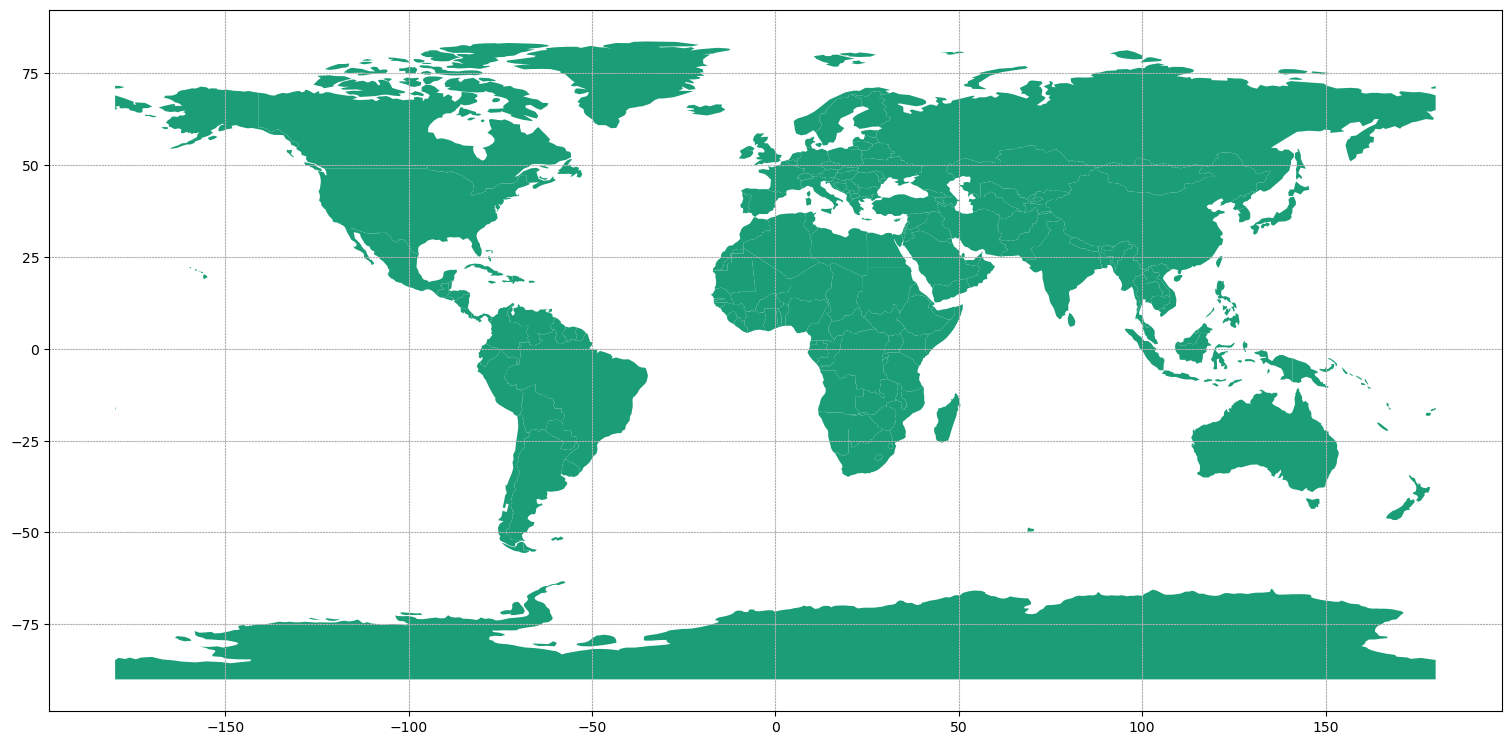

,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,...,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry,centroid,lon,lat
0,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,...,11,11,4,-99,1,Admin-0 country,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",POINT (66.08669 33.85640),66.086690,33.856399
1,1,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,...,6,6,4,-99,1,Admin-0 country,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",POINT (17.47057 -12.24587),17.470573,-12.245869
2,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,...,7,7,4,-99,1,Admin-0 country,"POLYGON ((20.59025 41.85540, 20.46318 41.51509...",POINT (20.03243 41.14135),20.032426,41.141353
3,1,4,United Arab Emirates,ARE,0,2,Sovereign country,United Arab Emirates,ARE,0,...,20,20,6,-99,1,Admin-0 country,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",POINT (54.20671 23.86863),54.206715,23.868634
4,1,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,0,...,9,9,4,-99,1,Admin-0 country,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",POINT (-65.17536 -35.44682),-65.175361,-35.446821


In [2]:
# URL for Natural Earth country-level data
url = 'https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_countries.geojson'

try:
    # Read the dataset
    world_df = gpd.read_file(url)

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world_df.plot(ax=ax)

    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

world_df['centroid'] = world_df.centroid                          #get centroids
world_df['lon'] = [i.xy[0][0] for i in world_df.centroid]         #get longitude
world_df['lat'] = [i.xy[1][0] for i in world_df.centroid]         #get latitide
world_df.head()

In [3]:
df= pd.read_csv('data/P_Data_Extract_From_Identification_for_Development_(ID4D)_Data.csv')

In [4]:
df_subset = df[['Country Code','Series Name', 'Series Code', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
                  '2020 [YR2020]', '2021 [YR2021]']]

# Dictionary of old column names (keys) and new column names (values)
rename_dict = {
    '2017 [YR2017]': '2017',
    '2018 [YR2018]': '2018',
    '2019 [YR2019]': '2019',
    '2020 [YR2020]': '2020',
    '2021 [YR2021]': '2021'
}

df_subset = df_subset.rename(columns=rename_dict)

In [5]:
df.head()

,Country Name,Country Code,Series Name,Series Code,2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Birth certification (%),ID.OWN.BRTH.ZS,..,..,..,..,..
1,Afghanistan,AFG,Completeness of birth registration (%),SP.REG.BRTH.ZS,..,..,..,..,..
2,Afghanistan,AFG,"Completeness of birth registration, female (%)",SP.REG.BRTH.FE.ZS,..,..,..,..,..
3,Afghanistan,AFG,"Completeness of birth registration, male (%)",SP.REG.BRTH.MA.ZS,..,..,..,..,..
4,Afghanistan,AFG,"Completeness of birth registration, rural (%)",SP.REG.BRTH.RU.ZS,..,..,..,..,..


In [6]:
def round_if_numeric(value):
    try:
        # Attempt to convert the value to a float and round it up
        return np.ceil(float(value))
    except (ValueError, TypeError):
        # If it's not a numeric value, return the original value
        return value

df_subset[['2017_data', '2018_data', '2019_data', '2020_data', '2021_data']] = df_subset[['2017','2018','2019','2020','2021']].applymap(round_if_numeric)

df_subset=df_subset[['Country Code', 'Series Name','Series Code','2017_data', '2018_data', '2019_data', '2020_data', '2021_data']]

In [7]:
unique_series = df_subset['Series Code'].unique()
pivoted_subsets = []

for series_code in unique_series:
    subset = df_subset[df_subset['Series Code'] == series_code]
    pivoted = subset.pivot(index='Country Code', columns='Series Name', values=['2017_data', '2018_data', '2019_data', '2020_data', '2021_data'])
    pivoted.columns = ['{}_{}'.format(series_name, year) for series_name, year in pivoted.columns]
    pivoted_subsets.append(pivoted)

# Combining all pivoted dataframes
combined_df = pd.concat(pivoted_subsets, axis=1)
combined_df.reset_index(inplace=True)

In [8]:
df_m = pd.merge(combined_df, world_df, left_on='Country Code', right_on='iso_a3')
df_m.shape

(158, 163)

In [9]:
y_list = [str(i) for i in list(range(2017,2022))]
v_list = ['2017_data_Completeness of birth registration (%)', '2018_data_Completeness of birth registration (%)', '2019_data_Completeness of birth registration (%)', '2020_data_Completeness of birth registration (%)', '2021_data_Completeness of birth registration (%)']
df_m.columns
df_m = gpd.GeoDataFrame(df_m, geometry='geometry')

In [10]:
df_m.head()

,Country Code,2017_data_Birth certification (%),2018_data_Birth certification (%),2019_data_Birth certification (%),2020_data_Birth certification (%),2021_data_Birth certification (%),2017_data_Completeness of birth registration (%),2018_data_Completeness of birth registration (%),2019_data_Completeness of birth registration (%),2020_data_Completeness of birth registration (%),...,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry,centroid,lon,lat
0,AFG,..,..,..,..,..,..,..,..,..,...,11,11,4,-99,1,Admin-0 country,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",POINT (66.08669 33.85640),66.086690,33.856399
1,AGO,..,..,..,..,..,..,..,..,..,...,6,6,4,-99,1,Admin-0 country,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",POINT (17.47057 -12.24587),17.470573,-12.245869
2,ALB,..,85.0,..,..,..,..,99.0,..,..,...,7,7,4,-99,1,Admin-0 country,"POLYGON ((20.59025 41.85540, 20.46318 41.51509...",POINT (20.03243 41.14135),20.032426,41.141353
3,ARE,..,..,..,..,..,..,100.0,..,..,...,20,20,6,-99,1,Admin-0 country,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",POINT (54.20671 23.86863),54.206715,23.868634
4,ARG,..,..,..,98.0,..,..,..,..,100.0,...,9,9,4,-99,1,Admin-0 country,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",POINT (-65.17536 -35.44682),-65.175361,-35.446821
